In [65]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
import seaborn as sns


# # # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# # import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Make DNA

In [ ]:
# Build DNA with nothing, will output DDD sequence
dna = mdna.make()
dna.describe()

In [ ]:
# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()

In [ ]:
# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()

## Make minicircle 

In [ ]:
# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200,circular=True)
print('Lk, Wr, Tw',dna.get_linking_number())
dna.draw()

# Lets also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# or save the structure to a pdb file
dna.save_pdb('minimized_nbp_200_closed.pdb')

## Writhe equilibration

In [ ]:
# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200,circular=True,dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration, note to equilibrate the writhe use equilibrate_writhe=True, otherwise the Lk will not be conserved
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()

## Shape Library

In [ ]:
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3,pitch=5,radius=7, num_turns=4)
dna = mdna.make(n_bp=300,control_points=control_points)
dna.draw()

## Custom shapes


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

DNA structure with 100 base pairs
Sequence: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Trajectory: <mdtraj.Trajectory with 1 frames, 4094 atoms, 200 residues, without unitcells>
Frames:  (100, 1, 4, 3)


'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'

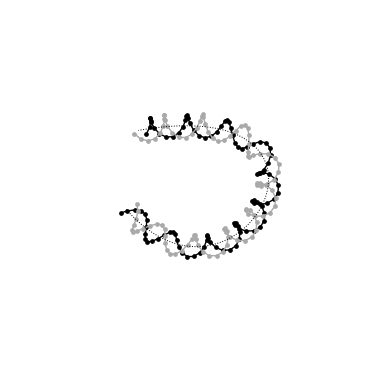

In [70]:
# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[3,4,30]])
dna = mdna.make(n_bp=100,control_points=control_points,sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence

## Extend

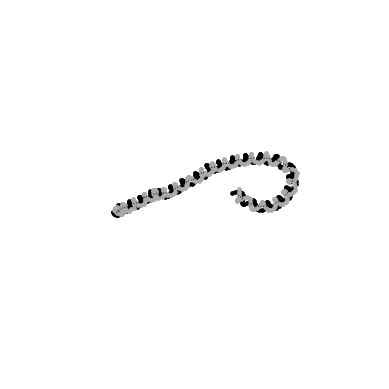

In [68]:
dna.extend()

Random sequence: CATG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 4

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 2
   bp per EV bead:     7
   Effective size:     3.572
   Exclusion distance: 4.0
######################################


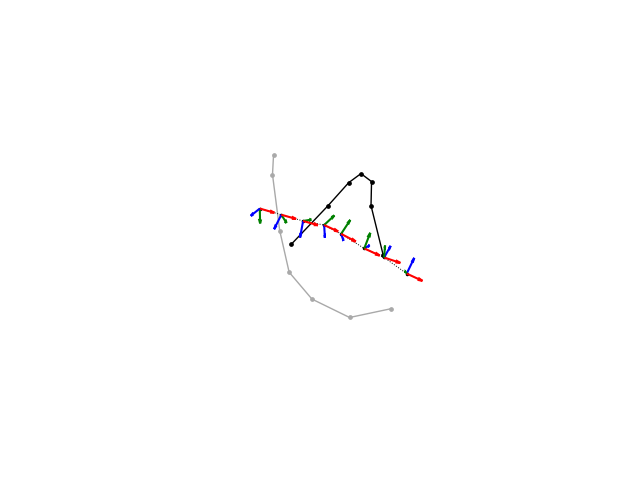

In [79]:
# We can also extend our DNA 
dna = mdna.make(n_bp=4)
dna.extend(sequence=['G']*4, minimize=True,forward=True)

# Or extend it in the opposite direction
#dna.extend(sequence=['C']*120,forward=False)
%matplotlib ipympl
dna.draw(triads=True)

## Connect

In [ ]:
# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA',control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG',control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands, the function will find the optimal number of basepairs to connect the two strands to minimize the twist 
dna2 = mdna.connect(dna0,dna1)
dna2.draw()
dna2.describe()

In [ ]:
view = nv.show_mdtraj(dna2.get_traj())
view

In [ ]:
# Build DNA with nothing, will output DDD sequence
dna = mdna.make()
dna.describe()


# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()


# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()


# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200,circular=True)
print('Lk, Wr, Tw',dna.get_linking_number())
dna.draw()

# Lets also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# or save it to a file
dna.save_pdb('minimized_nbp_200_closed.pdb')



# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200,circular=True,dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration, note to equilibrate the writhe use equilibrate_writhe=True, otherwise the Lk will not be conserved
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()


### Shape library
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3,pitch=5,radius=7, num_turns=4)
dna = mdna.make(n_bp=300,control_points=control_points)
dna.draw()


# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[3,4,30]])
dna = mdna.make(n_bp=100,control_points=control_points,sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence


# We can also extend our DNA 
dna.extend(sequence=['G']*120)

# Or extend it in the opposite direction
dna.extend(sequence=['C']*120,forward=False)
dna.draw()


# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA',control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG',control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands, the function will find the optimal number of basepairs to connect the two strands to minimize the twist 
dna2 = mdna.connect(dna0,dna1)
dna2.draw()
dna2.describe()


# visualize using nglview MC minmization
view = nv.show_mdtraj(dna2.get_MC_traj())
view